# SPARC-4 lightcurve example
***

This notebook provides an example of how to view and access a SPARC4 lightcurve data product for a variable star of the delta Scuti type.

* Eder Martioli, LNA 20 Sep 2024

In [ ]:
from astropy.io import fits
import matplotlib.pyplot as plt
import pandas as pd

import sparc4.product_plots as s4plt

### Set paths to example files 
Below we set the paths to example files, which are sparc4-pipeline products obtained from the reduction of data in the [minilcdata package](https://drive.google.com/file/d/1GJA7HB-j2YhbmLO82T1g-LNrbpYFn6OR/view?usp=drive_link).

In [ ]:
phot_stack_example = '/Users/eder/Data/SPARC4/minilcdata/reduced/20240618/sparc4acs1/20240618_s4c1_Gain2_1.0_Conventional_2_TOI-1853__stack.fits'
phot_lightcurve_example ='/Users/eder/Data/SPARC4/minilcdata/reduced/20240618/sparc4acs1/20240618_s4c1_TOI-1853_S_lc.fits'

Below we open the FITS file and print the catalog of sources with photometric quantities for an aperture with radius of 12 pixels

In [ ]:
hdul = fits.open(phot_stack_example)
catalog = 'CATALOG_PHOT_AP012'
pd.DataFrame(hdul[catalog].data)

Now we plot the stack image

In [ ]:
s4plt.plot_sci_frame(phot_stack_example, cat_ext=catalog, nstars=5, use_sky_coords=True)

Now we load the light curve FITS product and check its contents:

In [ ]:
lc = fits.open(phot_lightcurve_example)
pd.DataFrame(lc["CATALOG_PHOT_AP010"].data)

Below we select the source with index number 1 assigned as the main target to be analyzed. Then we select three other stars with indices 0, 2, and 3, as comparisons for differential photometry. All indices are displayed in the image above.  

After selecting the stars we use the function `s4plt.plot_light_curve` to produce plots of the lightcurve data.

In [ ]:
target=1
comps=[0,2,3]

lc = s4plt.plot_light_curve(phot_lightcurve_example, target=target, comps=comps, nsig=10,
                            plot_coords=False, plot_rawmags=False, plot_sum=True,
                            plot_comps=True, catalog_name=catalog)

print(lc)

# Plot data for all 4 channels together

In [2]:
object_name = 'ASASSN-V J140530.18+165743.8'
object_indexes = [1,1,3,4]
comps = [[2,3],[2],[0,1,2],[0,1,2,3]]
aperture_radius = 12

# Stack images
s1 = '/Users/eder/Data/SPARC4/minilcdata/reduced/20240618/sparc4acs1/20240618_s4c1_Gain2_1.0_Conventional_2_TOI-1853__stack.fits'
s2 = '/Users/eder/Data/SPARC4/minilcdata/reduced/20240618/sparc4acs2/20240618_s4c2_Gain2_1.0_Conventional_2_TOI-1853__stack.fits'
s3 = '/Users/eder/Data/SPARC4/minilcdata/reduced/20240618/sparc4acs3/20240618_s4c3_Gain2_1.0_Conventional_2_TOI-1853__stack.fits'
s4 = '/Users/eder/Data/SPARC4/minilcdata/reduced/20240618/sparc4acs4/20240618_s4c4_Gain2_1.0_Conventional_2_TOI-1853__stack.fits'

stackfiles = [s1,s2,s3,s4]

# Light curves
lc1 = '/Users/eder/Data/SPARC4/minilcdata/reduced/20240618/sparc4acs1/20240618_s4c1_TOI-1853_S_lc.fits'
lc2 = '/Users/eder/Data/SPARC4/minilcdata/reduced/20240618/sparc4acs2/20240618_s4c2_TOI-1853_S_lc.fits'
lc3 = '/Users/eder/Data/SPARC4/minilcdata/reduced/20240618/sparc4acs3/20240618_s4c3_TOI-1853_S_lc.fits'
lc4 = '/Users/eder/Data/SPARC4/minilcdata/reduced/20240618/sparc4acs4/20240618_s4c4_TOI-1853_S_lc.fits'
    
lcfiles = [lc1,lc2,lc3,lc4]

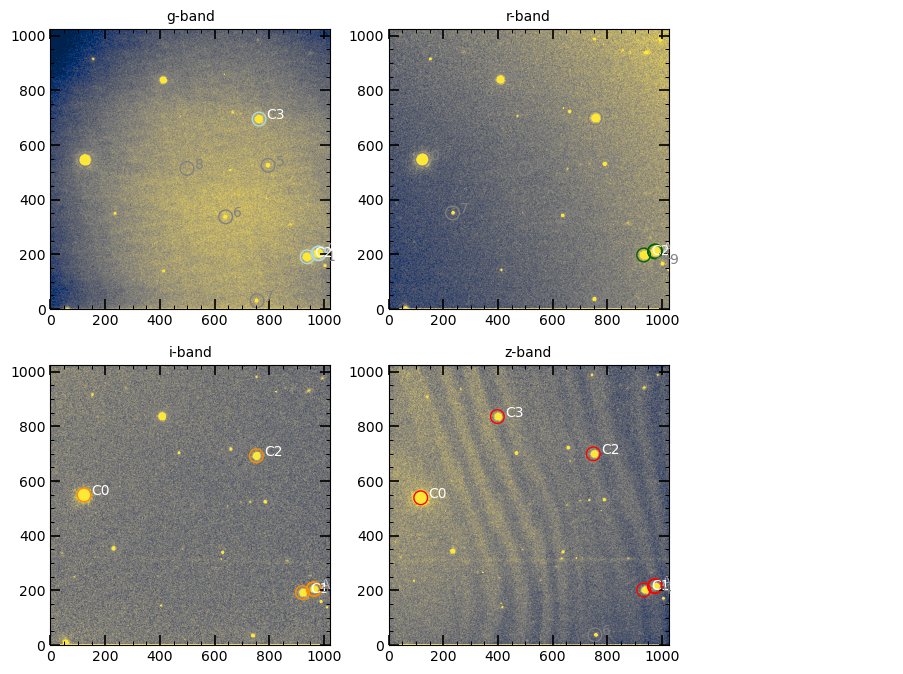

In [3]:
s4plt.plot_s4data_for_diffphot(stackfiles, object_indexes=object_indexes, comps=comps, aperture_radius=25, object_name=object_name)

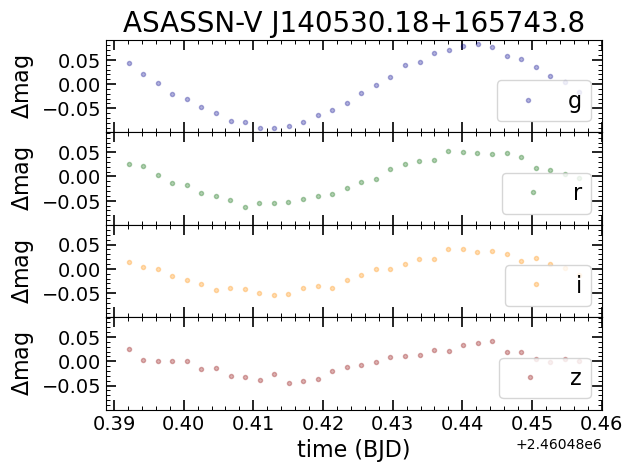

In [4]:
lcs = s4plt.plot_s4_lightcurves(lcfiles, object_indexes=object_indexes, comps=comps, aperture_radius=aperture_radius, object_name=object_name)